In [1]:
# 数据处理所需的库
import random
import numpy as np
import pandas as pd

# 数据可视化所需的库
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap  
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

# 机器学习预处理所需的库
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 机器学习算法所需的库
from sklearn.ensemble import RandomForestClassifier

# 机器学习评价指标所需的库
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, r2_score 
from sklearn.metrics import classification_report

# 其他所需的库
import warnings
warnings.filterwarnings('ignore')

# 数据质量检测

## 数据合并

### 加载数据

In [2]:
# 临床信息：个人史，疾病史，发病史，治疗史数据
table1 = pd.read_excel(r'.\表1-患者列表及临床信息.xlsx')
table1 = table1.rename(columns={'入院首次影像检查流水号': '流水号'})
table1

,ID,90天mRS,数据集划分,流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,饮酒史,发病到首次影像检查时间间隔,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,sub001,4,训练,20161212002136,43,女,0,0,0,0,...,0,2.5,180/90,0,1,1,1,1,1,1
1,sub002,0,训练,20160406002131,58,男,0,1,0,0,...,0,3.0,199/120,0,1,1,1,0,1,1
2,sub003,5,训练,20160413000006,78,男,0,1,0,0,...,0,2.0,199/120,0,1,1,1,1,1,1
3,sub004,4,训练,20161215001667,70,男,2,1,1,0,...,0,1.0,186/99,0,1,1,1,0,0,0
4,sub005,3,训练,20161222000978,51,男,0,0,0,0,...,0,5.0,135/92,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,4,训练,20180802001789,93,女,0,0,0,0,...,0,1.0,181/76,0,0,0,1,1,1,1
96,sub097,2,训练,20181010000767,83,女,0,1,0,0,...,0,3.0,170/79,0,1,1,1,1,1,1
97,sub098,5,训练,20180612002507,82,男,0,1,1,1,...,0,2.5,200/100,0,1,1,1,1,1,1
98,sub099,3,训练,20180620002296,53,男,0,1,0,0,...,0,3.0,159/91,1,1,1,1,1,1,1


### 堆叠合并

In [3]:
df1 = pd.DataFrame(
    data=[['a', 'a'], ['aa', 'aa']],
    index=['1', '2'],
    columns=['a', 'aa'])
df2 = pd.DataFrame(
    data=[['b', 'b'], ['bb', 'bb']],
    index=['3', '4'],
    columns=['b', 'bb'])
df3 = pd.DataFrame(
    data=[['c', 'c'], ['cc', 'cc']],
    index=['5', '6'],
    columns=['c', 'cc'])
print('纵向合并外连接', pd.concat([df1, df2, df3], axis=0, join="outer"))
print('纵向合并内连接', pd.concat([df1, df2, df3], axis=0, join="inner"))
print('横向合并外连接', pd.concat([df1, df2, df3], axis=1, join="outer"))
print('横向合并内连接', pd.concat([df1, df2, df3], axis=1, join="inner"))

纵向合并外连接      a   aa    b   bb    c   cc
1    a    a  NaN  NaN  NaN  NaN
2   aa   aa  NaN  NaN  NaN  NaN
3  NaN  NaN    b    b  NaN  NaN
4  NaN  NaN   bb   bb  NaN  NaN
5  NaN  NaN  NaN  NaN    c    c
6  NaN  NaN  NaN  NaN   cc   cc
纵向合并内连接 Empty DataFrame
Columns: []
Index: [1, 2, 3, 4, 5, 6]
横向合并外连接      a   aa    b   bb    c   cc
1    a    a  NaN  NaN  NaN  NaN
2   aa   aa  NaN  NaN  NaN  NaN
3  NaN  NaN    b    b  NaN  NaN
4  NaN  NaN   bb   bb  NaN  NaN
5  NaN  NaN  NaN  NaN    c    c
6  NaN  NaN  NaN  NaN   cc   cc
横向合并内连接 Empty DataFrame
Columns: [a, aa, b, bb, c, cc]
Index: []


### 主键合并

In [4]:
df1 = pd.DataFrame(
    data=[['a', 'a'], ['tt', 'tt']],
    index=['1', '2'],
    columns=['a', 'temp'])
df2 = pd.DataFrame(
    data=[['tt', 'tt'], ['bb', 'bb']],
    index=['3', '4'],
    columns=['temp', 'bb'])
print('主键合并外连接', pd.merge(df1, df2, how='outer', on='temp'))
print('主键合并内连接', pd.merge(df1, df2, on='temp'))

主键合并外连接      a temp   bb
0    a    a  NaN
1   tt   tt   tt
2  NaN   bb   bb
主键合并内连接     a temp  bb
0  tt   tt  tt


## 数据预处理【要创建原数据副本】

这样，table1为未进行数据预处理的，temp为进行数据预处理的

### 删除重复值

In [5]:
temp = table1.copy()
print('删除重复值前数据集尺寸为:', temp.shape)
temp.drop_duplicates(keep='first', inplace=True)
print('删除重复值后数据集尺寸为:', temp.shape)

删除重复值前数据集尺寸为: (100, 23)
删除重复值后数据集尺寸为: (100, 23)


### 填补缺失值

In [6]:
print('查看是否有缺失值:', temp.isnull().sum())

# 当有缺失值时，每列可以填充不同的值
# print('每列填充不同的值', temp.fillna(value={"a": 6, "b": 7, "c": 8}))

查看是否有缺失值: ID               0
90天mRS           0
数据集划分            0
流水号              0
年龄               0
性别               0
脑出血前mRS评分        0
高血压病史            0
卒中病史             0
糖尿病史             0
房颤史              0
冠心病史             0
吸烟史              0
饮酒史              0
发病到首次影像检查时间间隔    0
血压               0
脑室引流             0
止血治疗             0
降颅压治疗            0
降压治疗             0
镇静、镇痛治疗          0
止吐护胃             0
营养神经             0
dtype: int64


### 修改异常值

对于异常值的处理要慎之又慎，因为有时候特征是有实际意义的，统计意义上的异常值可能并不影响结果。

如果实在不确定是否要修改异常值，可以根据模型结果来判断，如果修改异常值模型结果变好就修改。

#### 箱线图判断异常值

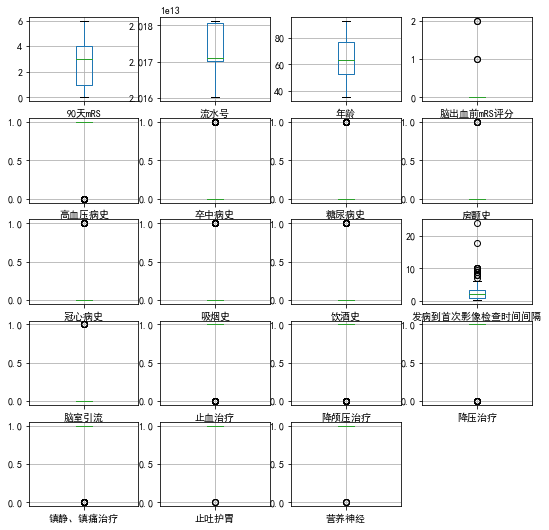

In [7]:
plt.figure(figsize=(9, 9))
# 此时需要把数值型特征提取出来，一共19个
numeric_cols = temp.select_dtypes(include=['int64', 'float64']).columns.tolist()
for i in range(1, len(numeric_cols)+1):
    plt.subplot(5,4,i)
    temp.boxplot(numeric_cols[i-1])

In [8]:
# 利用箱线图分析时，异常值通常被定义为小于QL-1.5*IQR或大于QU+1.5IQR（QL指下四分位数，QU指上四分位数，IQR指QU-QL）。
# 把异常值赋值为nan，然后就可以按照缺失值删除处理。
temp1 = temp.copy()
temp1

def outRange(Seri):
    QL = Seri.quantile(0.25)
    QU = Seri.quantile(0.75)
    IQR = QU-QL
    Seri[(Seri < QL-1.5*IQR) | (Seri > QU+1.5*IQR)] = np.nan
    return Seri
for i in numeric_cols:
    # 这是否真的是异常值还要结合现实情况进行分析
    print(f'特征{i}的异常值个数为：', outRange(temp1[i]).isnull().sum())

特征90天mRS的异常值个数为： 0
特征流水号的异常值个数为： 0
特征年龄的异常值个数为： 0
特征脑出血前mRS评分的异常值个数为： 4
特征高血压病史的异常值个数为： 12
特征卒中病史的异常值个数为： 19
特征糖尿病史的异常值个数为： 17
特征房颤史的异常值个数为： 5
特征冠心病史的异常值个数为： 9
特征吸烟史的异常值个数为： 19
特征饮酒史的异常值个数为： 12
特征发病到首次影像检查时间间隔的异常值个数为： 14
特征脑室引流的异常值个数为： 6
特征止血治疗的异常值个数为： 21
特征降颅压治疗的异常值个数为： 24
特征降压治疗的异常值个数为： 8
特征镇静、镇痛治疗的异常值个数为： 15
特征止吐护胃的异常值个数为： 3
特征营养神经的异常值个数为： 4


#### 判断完异常值用四分位数进行替换【也可以采用其它统计指标】

这样做的一个坏处是如果特征取值全部是整数，替换后就不对了。

In [9]:
# def outRange(Seri):
#     QL = Seri.quantile(0.25)
#     QU = Seri.quantile(0.75)
#     IQR = QU-QL
#     Seri.loc[Seri < QL-1.5*IQR] = QL
#     Seri.loc[Seri > QU+1.5*IQR] = QU
#     return Seri
# for i in numeric_cols:
#     table1[i] = outRange(temp[i])

#### 3西格玛原则判断异常值

In [10]:
# 3西格玛原则通常用于统计学中，表示一个数据点落在均值加减3个标准差范围内的概率大约是99.73%
# 因此，如果一个数据点落在这个范围之外，我们可以认为它是一个异常值或极端值
temp2 = temp.copy()
temp2
def outRange(Seri):
    # 计算均值和标准差
    s_mean = Seri.mean()
    s_std = Seri.std()
    # 计算3西格玛的上下限  
    lower_bound = s_mean - 3 * s_std 
    upper_bound = s_mean + 3 * s_std
    Seri[(Seri < lower_bound) | (Seri > upper_bound)] = np.nan
    return Seri
for i in numeric_cols:
    # 这是否真的是异常值还要结合现实情况进行分析
    print(f'特征{i}的异常值个数为：', outRange(temp2[i]).isnull().sum())

特征90天mRS的异常值个数为： 0
特征流水号的异常值个数为： 0
特征年龄的异常值个数为： 0
特征脑出血前mRS评分的异常值个数为： 4
特征高血压病史的异常值个数为： 0
特征卒中病史的异常值个数为： 0
特征糖尿病史的异常值个数为： 0
特征房颤史的异常值个数为： 5
特征冠心病史的异常值个数为： 9
特征吸烟史的异常值个数为： 0
特征饮酒史的异常值个数为： 0
特征发病到首次影像检查时间间隔的异常值个数为： 2
特征脑室引流的异常值个数为： 6
特征止血治疗的异常值个数为： 0
特征降颅压治疗的异常值个数为： 0
特征降压治疗的异常值个数为： 8
特征镇静、镇痛治疗的异常值个数为： 0
特征止吐护胃的异常值个数为： 3
特征营养神经的异常值个数为： 4


#### 判断完异常值用边界值替换【也可以采用其它统计指标】

In [11]:
# def outRange(Seri):
#     # 计算均值和标准差
#     s_mean = Seri.mean()
#     s_std = Seri.std()
#     # 计算3西格玛的上下限  
#     lower_bound = s_mean - 3 * s_std 
#     upper_bound = s_mean + 3 * s_std
#     Seri.loc[Seri < lower_bound] = lower_bound
#     Seri.loc[Seri < upper_bound] = upper_bound
#     return Seri
# for i in numeric_cols:
#     table1[i] = outRange(temp[i])

## 数据可视化

### 数值型类别型时间型特征

In [12]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             100 non-null    object 
 1   90天mRS         100 non-null    int64  
 2   数据集划分          100 non-null    object 
 3   流水号            100 non-null    int64  
 4   年龄             100 non-null    int64  
 5   性别             100 non-null    object 
 6   脑出血前mRS评分      100 non-null    int64  
 7   高血压病史          100 non-null    int64  
 8   卒中病史           100 non-null    int64  
 9   糖尿病史           100 non-null    int64  
 10  房颤史            100 non-null    int64  
 11  冠心病史           100 non-null    int64  
 12  吸烟史            100 non-null    int64  
 13  饮酒史            100 non-null    int64  
 14  发病到首次影像检查时间间隔  100 non-null    float64
 15  血压             100 non-null    object 
 16  脑室引流           100 non-null    int64  
 17  止血治疗           100 non-null    int64  
 18  降颅压治疗      

### 数值型特征查看统计摘要

数量，均值，标准差，最小值，下四分位数，中位数，上四分位数，最大值

In [13]:
table1.describe()

,90天mRS,流水号,年龄,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,发病到首次影像检查时间间隔,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
count,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,100.00000,100.000000,100.000000
mean,2.660000,2.017248e+13,63.870000,0.060000,0.880000,0.190000,0.170000,0.050000,0.090000,0.190000,0.120000,3.280900,0.060000,0.79000,0.760000,0.92000,0.85000,0.970000,0.960000
std,1.689062,7.799753e+09,13.892557,0.312048,0.326599,0.394277,0.377525,0.219043,0.287623,0.394277,0.326599,3.680113,0.238683,0.40936,0.429235,0.27266,0.35887,0.171447,0.196946
min,0.000000,2.016012e+13,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,1.000000,2.017012e+13,53.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000
50%,3.000000,2.017100e+13,63.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000
75%,4.000000,2.018051e+13,77.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.250000,0.000000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000
max,6.000000,2.018122e+13,93.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000


### 类别型特征查看频数

In [14]:
table1['性别'].value_counts()

男    69
女    31
Name: 性别, dtype: int64

### 时间型特征字符串转为时间

### 绘制患者年龄折线图

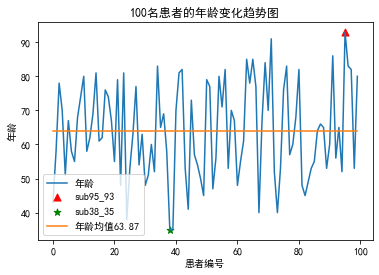

患者最大年龄为: 93
患者最大年龄编号为: 95
患者最小年龄为: 35
患者最小年龄编号为: 38
患者平均年龄为: 63.87


In [15]:
Temp = table1.copy()
Temp['年龄'].plot()
plt.title('100名患者的年龄变化趋势图')
plt.xlabel('患者编号')
plt.ylabel('年龄')

plt.scatter(95, 93, color='red', marker='^', s=50)
plt.scatter(38, 35, color='green', marker='*', s=50)
plt.plot(range(100),[Temp['年龄'].mean()]*100)
plt.legend(['年龄','sub95_93','sub38_35','年龄均值63.87'])
plt.show()

print('患者最大年龄为:', max(list(Temp['年龄'])))
print('患者最大年龄编号为:', list(Temp['年龄']).index(max(list(Temp['年龄']))))
print('患者最小年龄为:', min(list(Temp['年龄'])))
print('患者最小年龄编号为:', list(Temp['年龄']).index(min(list(Temp['年龄']))))
print('患者平均年龄为:', np.mean(list(Temp['年龄'])))

### 逻辑型特征的堆叠面积图

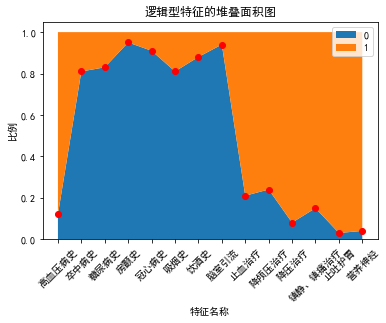

In [16]:
name = ['高血压病史', '卒中病史', '糖尿病史', '房颤史', '冠心病史', '吸烟史',
       '饮酒史','脑室引流', '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗',
       '止吐护胃', '营养神经']
rate_1 = Temp[name].sum()/100
rate_0 = 1-rate_1
plt.stackplot(name, rate_0, rate_1, labels=['分类1','分类2'])
plt.xlabel('特征名称')
plt.ylabel('比例')
plt.xticks(rotation=45)
plt.legend(['0','1'])
plt.scatter(name,rate_0, color='red')
plt.title('逻辑型特征的堆叠面积图')
plt.show()

## 数据标准化

### 归一标准化

In [17]:
def Normalization(Seri):
    return Seri/Seri.sum()
# 缺点是如果最大值很大，则标准化后的值趋向于0

### 离差标准化

In [18]:
def MinMaxScale(Seri):
    return (Seri-Seri.min())/(Seri.max()-Seri.min())
# 缺点是如果极差很大，则标准化后的值趋向于0

### Z-score标准化

In [19]:
def StandardScale(Seri):
    return (Seri-Seri.mean())/Seri.std()
# 适用范围最广

## 数据类别不平衡处理

In [20]:
numeric_cols = table1.select_dtypes(include=['int64', 'float64']).columns.tolist()
X = table1[numeric_cols].copy()
X.drop(columns=['流水号'], inplace=True)
shou_suo, shu_zhang = [],[]
for s in list(table1['血压']):
    shou_suo.append(int(s.split('/')[0]))
    shu_zhang.append(int(s.split('/')[1]))
X['收缩压'] = shou_suo
X['舒张压'] = shu_zhang
X['性别'] = table1['性别'].map({'男': 1, '女': 0})

label = pd.read_excel(r'.\label.xlsx')
num = label.shape[0]
# 创建SMOTE实例【在数据集中真实情况0：75，1：25】
smote = SMOTE(sampling_strategy={0: num-label['label'].sum(), 1: num-label['label'].sum()})  

# 对数据集进行SMOTE过采样处理,数据量变为了(150,21)
X_smote, label_smote = smote.fit_resample(X, label) 

# 特征工程

## 特征选择

### 相关性分析

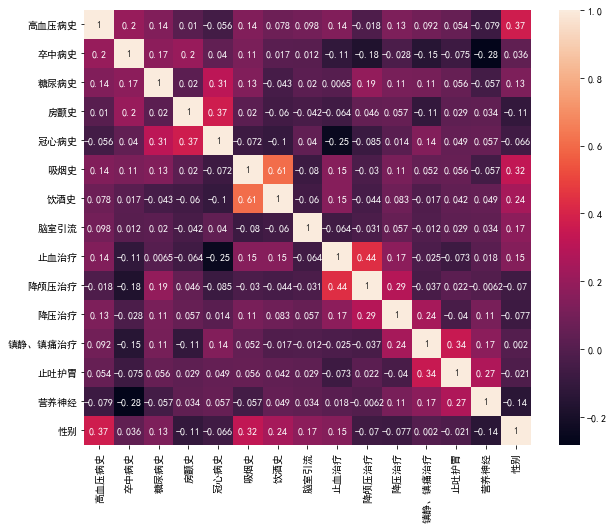

In [21]:
# 自定义一个函数，检查一个Series中是否所有值都是0或1  
def is_binary(series):  
    return set(series) <= {0, 1}  
  
# 使用apply方法，沿着列方向应用这个函数  
binary_cols = X_smote.apply(is_binary)  

# 使用any函数查看哪些列是二值的  
binary_cols = binary_cols[binary_cols].index.tolist()  
corrcoef_data1 = X_smote[binary_cols]
# 删除这些二值列，方便后续皮尔逊分析
corrcoef_data2 = X_smote.drop(columns=binary_cols)

# 计算斯皮尔曼相关系数  
corrcoef_1 = corrcoef_data1.corr(method='spearman')  
  
# 可视化相关系数  
plt.figure(figsize=(10, 8))  
sns.heatmap(corrcoef_1, annot=True)  
plt.show()

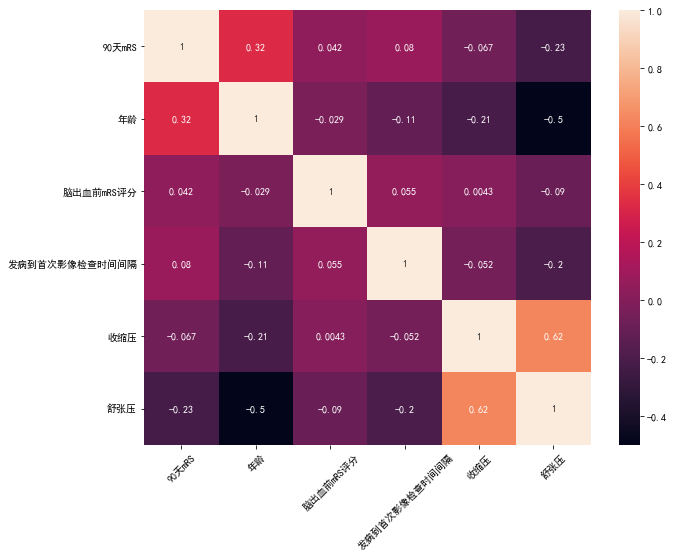

In [22]:
# 计算皮尔逊相关系数  
corrcoef_2 = corrcoef_data2.corr()  
  
# 可视化相关系数  
plt.figure(figsize=(10, 8))  
sns.heatmap(corrcoef_2, annot=True)  
plt.xticks(rotation=45)  
plt.show()

In [23]:
# 提取出大于0.6的特征
del_feature = []
for i in range(len(corrcoef_1.columns)-1):
    if corrcoef_1[corrcoef_1.columns[i]][corrcoef_1.columns[i+1]]>0.6 and corrcoef_1[corrcoef_1.columns[i]][corrcoef_1.columns[i+1]]<1:
        del_feature.append(corrcoef_1.columns[i])
        print(corrcoef_1.columns[i])
        break
for i in range(len(corrcoef_2.columns)-1):
    if corrcoef_2[corrcoef_2.columns[i]][corrcoef_2.columns[i+1]]>0.6 and corrcoef_2[corrcoef_2.columns[i]][corrcoef_2.columns[i+1]]<1:
        del_feature.append(corrcoef_2.columns[i])
        print(corrcoef_2.columns[i])
        break        
corrcoef_data3 = X_smote.drop(columns=del_feature)
corrcoef_data3

吸烟史
收缩压


,90天mRS,年龄,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,饮酒史,发病到首次影像检查时间间隔,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,舒张压,性别
0,4,43,0,0,0,0,0,0,0,2.500000,0,1,1,1,1,1,1,90,0
1,0,58,0,1,0,0,0,0,0,3.000000,0,1,1,1,0,1,1,120,1
2,5,78,0,1,0,0,0,0,0,2.000000,0,1,1,1,1,1,1,120,1
3,4,70,2,1,1,0,0,0,0,1.000000,0,1,1,1,0,0,0,99,1
4,3,51,0,0,0,0,0,0,0,5.000000,0,1,1,0,0,1,1,92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,3,80,0,0,0,0,0,0,0,1.572256,0,1,1,1,1,1,1,80,0
146,4,77,0,1,1,0,1,0,0,1.965265,0,1,1,1,0,1,1,101,0
147,1,58,0,1,0,0,0,0,0,1.000000,0,1,0,1,1,1,1,98,1
148,5,76,0,1,0,1,0,1,0,1.537723,0,1,1,1,1,1,1,100,1


### 关联度分析【感觉不对】

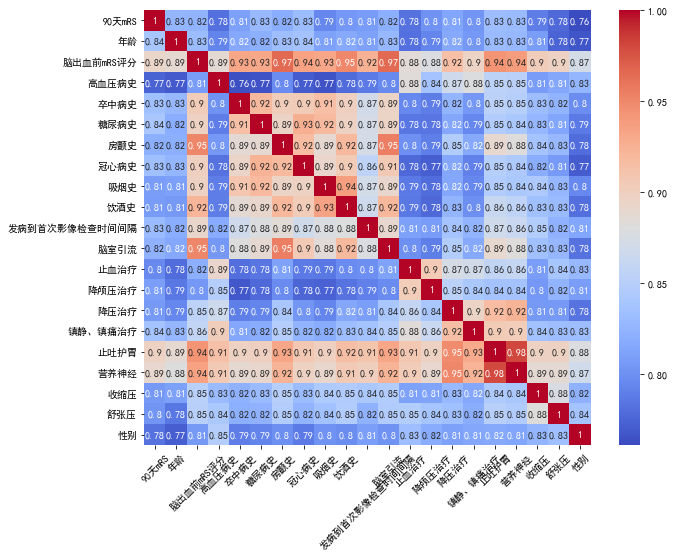

In [24]:
scaler = StandardScaler()  
# 对DataFrame进行标准化处理  
df_scaled = pd.DataFrame(scaler.fit_transform(X_smote), columns=X_smote.columns) 

def gray(df_,p,index):
    # df_表示以行为指标的dataframe,p为分辨系数
    df_ = np.abs(df_ - df_.iloc[index,:]) # 每一行指标和要参考的指标做减法，取绝对值。
    global_max = df_.max().max()
    global_min = df_.min().min()
    df_r = (global_min + p*global_max)/(df_ + p*global_max) # 求关联矩阵
    return df_r.mean(axis=1)
guanlian_1 = []
for i in range(df_scaled.shape[1]):
    guanlian_1.append(list(gray(df_scaled.T,0.5,i)))
guanlian_data1 = pd.DataFrame(guanlian_1, index=df_scaled.columns, columns=df_scaled.columns)  
# 可视化相关系数  
plt.figure(figsize=(10, 8))  
sns.heatmap(guanlian_data1, annot=True, cmap='coolwarm')  
plt.xticks(rotation=45)
plt.show()

## 特征提取(以corrcoef_data3为例）

### 随机森林【是不是要归结到特征选择】

In [25]:
x_train, x_test, y_train, y_test = train_test_split(corrcoef_data3, label_smote, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=32)
# 网格搜索，bootstrap要设置为False
param_grid = [
    {'bootstrap':[False], 'n_estimators':range(1,10), 'max_leaf_nodes':range(1, 10)}
]
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', return_train_score=True)
grid_search.fit(x_train, y_train)

model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'],random_state=32)
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print('分类结果为：', y_pred)
print('训练集精度为：', model.score(x_train, y_train))
print('测试集精度为：', model.score(x_test, y_test))
print('模型的R方值：',r2_score(y_test,y_pred))
print('模型混淆矩阵:','\n',confusion_matrix(y_test,y_pred))
print('模型分类报告:','\n',classification_report(y_test,y_pred))

分类结果为： [0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0]
训练集精度为： 0.8833333333333333
测试集精度为： 0.8
模型的R方值： 0.19999999999999996
模型混淆矩阵: 
 [[ 9  6]
 [ 0 15]]
模型分类报告: 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.71      1.00      0.83        15

    accuracy                           0.80        30
   macro avg       0.86      0.80      0.79        30
weighted avg       0.86      0.80      0.79        30



AUC: 0.80


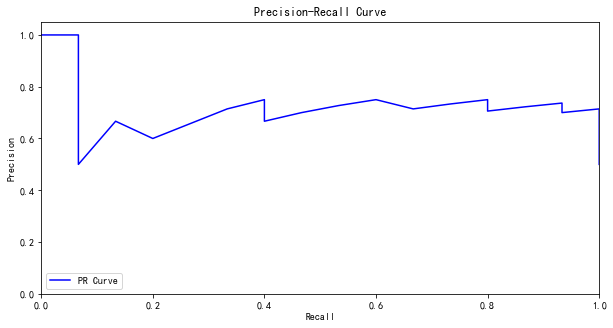

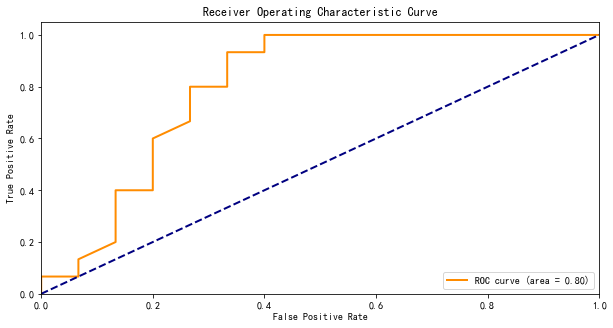

In [26]:
# 预测概率  
y_pred_prob = model.predict_proba(x_test)[:,1]

# 计算PR曲线的指标  
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_prob)  
  
# 计算ROC曲线的指标  
fpr, tpr, thresholds_roc = metrics.roc_curve(y_test, y_pred_prob)  
# 计算AUC值  
auc = metrics.auc(fpr, tpr)  
print('AUC: %.2f' % auc)
  
# 绘制PR曲线  
plt.figure(figsize=(10, 5))  
plt.plot(recall, precision, color='b', label='PR Curve')  
plt.xlabel('Recall')  
plt.ylabel('Precision')  
plt.ylim([0.0, 1.05])  
plt.xlim([0.0, 1.0])  
plt.title('Precision-Recall Curve')  
plt.legend(loc="lower left")  
plt.show()  
  
# 绘制ROC曲线  
plt.figure(figsize=(10, 5))  
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))  
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver Operating Characteristic Curve')  
plt.legend(loc="lower right")  
plt.show()

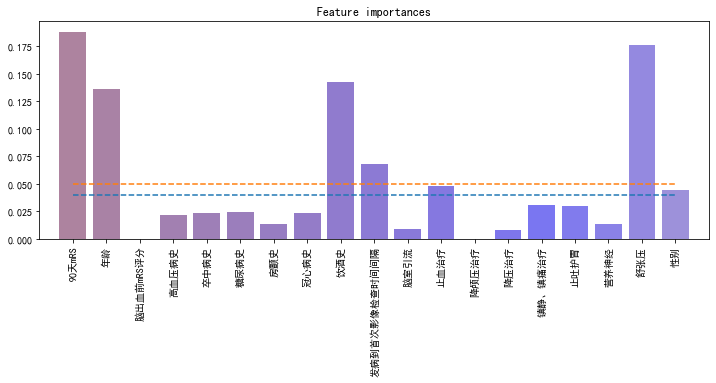

In [27]:
# 绘制特征重要性条形图  
# 创建自定义颜色映射  
np.random.seed(120)
num = len(model.feature_importances_)
colors = [(np.random.random(), np.random.random(), np.random.random()) for _ in range(num)]  
cmap = LinearSegmentedColormap.from_list('random_cmap', colors)  
plt.figure(figsize=(12, 4))  
plt.title("Feature importances")  
plt.bar(range(num), model.feature_importances_, color=cmap(np.arange(num)), align="center")  
plt.plot(range(num), [0.04]*num, linestyle='--')
plt.plot(range(num), [0.05]*num, linestyle='--')
plt.xticks(range(num), corrcoef_data3.columns, rotation=90)  
plt.xlim([-1, num])  
plt.show()

Text(0.5, 1.0, '血肿扩张风险显著影响因素')

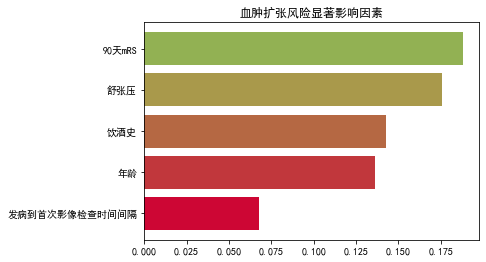

In [28]:
temp1,temp2 = [],[]
for name, score in zip(corrcoef_data3.columns, model.feature_importances_):
    if score>=0.05:
        temp1.append(score)
        temp2.append(name)
# 将列表转换为numpy数组  
x_np = np.array(temp1)  
# 使用argsort函数获取排序索引  
sort_index = np.argsort(x_np)  
x_sort,y_sort = sorted(temp1),[]

# 创建自定义颜色映射  
colors = [(np.random.random(), np.random.random(), np.random.random()) for _ in range(73)]  
cmap = LinearSegmentedColormap.from_list('random_cmap', colors) 

for i in sort_index:
    y_sort.append(temp2[i])
plt.barh(y_sort, x_sort, color=cmap(np.arange(12)))  
plt.title('血肿扩张风险显著影响因素')

In [29]:
# 提取出大于0.03的特征
del_feature = []
for name, score in zip(corrcoef_data3.columns, model.feature_importances_):
    if score<0.05:
        del_feature.append(name)
suiji_data1 = corrcoef_data3.drop(columns=del_feature)
suiji_data1

,90天mRS,年龄,饮酒史,发病到首次影像检查时间间隔,舒张压
0,4,43,0,2.500000,90
1,0,58,0,3.000000,120
2,5,78,0,2.000000,120
3,4,70,0,1.000000,99
4,3,51,0,5.000000,92
...,...,...,...,...,...
145,3,80,0,1.572256,80
146,4,77,0,1.965265,101
147,1,58,0,1.000000,98
148,5,76,0,1.537723,100


### 主成分分析

In [30]:
scaler = StandardScaler()  
df_scaled = pd.DataFrame(scaler.fit_transform(corrcoef_data3), columns=corrcoef_data3.columns) 

pca = PCA(n_components=12)
pca.fit_transform(df_scaled)
# 通过属性components_可以查看主成分
# pca.components_.T[:, 0]

# 通过可解释方差比衡量差异性贡献度
print('前12个主成分的贡献度之和为：', sum(pca.explained_variance_ratio_))
print('前12个主成分的贡献度为：', pca.explained_variance_ratio_)

前12个主成分的贡献度之和为： 0.8472100360734814
前12个主成分的贡献度为： [0.15201175 0.10825068 0.10291532 0.08508074 0.07331332 0.06091829
 0.05207001 0.05058674 0.04869785 0.04054504 0.03707165 0.03574866]


Text(0.5, 1.0, '主成分贡献度')

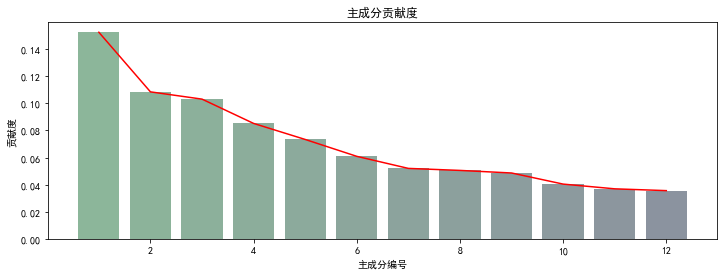

In [31]:
# 创建自定义颜色映射  
np.random.seed(0)
colors = [(np.random.random(), np.random.random(), np.random.random()) for _ in range(12)]  
cmap = LinearSegmentedColormap.from_list('random_cmap', colors)  

plt.figure(figsize=(12, 4))  
plt.title("Feature importances")  
plt.bar(range(1, 1+len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, color=cmap(np.arange(corrcoef_data3.shape[1])), align="center") 
plt.plot(range(1, 1+len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_,'r')
plt.xlabel('主成分编号')
plt.ylabel('贡献度')
plt.title('主成分贡献度')

In [32]:
# 通过下面方式和分类模型结合
# pca = PCA(n_components=15)
# pca.fit_transform(x_train)
# pca.fit_transform(x_test) 